In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("cp_new_reg1.csv")

In [3]:
df.head()


df


,branch-load-misses,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,L1-dcache-load-misses,l1d_pend_miss.pending_cycles,l2_rqsts.code_rd_miss,l2_rqsts.all_demand_miss,l2_rqsts.demand_data_rd_miss,l1d_pend_miss.pending_cycles.1,l2_rqsts.code_rd_miss.1,l2_rqsts.rfo_miss,cache-misses,LLC-load-misses,LLC-store-misses,CPI
0,1569464,1560335,745,2214,1034,18660,27119116,69156775,27724,509862.0,282979.0,105532310.0,18399.0,104469.0,1958819.0,55088,75550,2.28
1,1503093,1534734,1227,3038,822,16121,26451191,45339174,18143,501202.0,310403.0,96975088.0,13214.0,113253.0,2214506.0,143288,83395,2.15
2,1496280,1458745,673,1627,795,17231,27507723,46610160,12797,513101.0,353735.0,63549990.0,22862.0,148448.0,1997932.0,107910,87158,2.06
3,1425028,1424596,682,2004,874,20839,27973765,50191775,21714,498492.0,350031.0,50869443.0,19954.0,184410.0,1359023.0,76721,59044,2.07
4,1399816,1435720,1173,3581,1000,32337,23581749,92379088,23041,494552.0,330538.0,46754106.0,16016.0,150864.0,783466.0,61622,55557,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,894995,877349,593,28137,888,22510,17346689,168981088,18819,725835.0,783591.0,176844848.0,47601.0,22207.0,2016546.0,241659,30019,2.30
1173,839199,813540,646,22962,812,27693,16929326,171373981,18683,824234.0,703138.0,190729150.0,18480.0,5062.0,6949364.0,463573,1010,1.44
1174,675997,697010,5076,23231,839,17254,17956603,147023289,14266,1010439.0,912162.0,163034721.0,15387.0,4671.0,6384510.0,438250,1294,1.76
1175,874743,902432,930,17326,947,27511,20587711,143296828,17534,856522.0,856000.0,174291277.0,13435.0,5034.0,6422423.0,492593,1020,1.37


In [4]:
df.shape

(1177, 18)

In [5]:
print(df.corr())

                                branch-load-misses  branch-misses  \
branch-load-misses                        1.000000       0.994624   
branch-misses                             0.994624       1.000000   
iTLB-load-misses                          0.265151       0.267856   
dTLB-load-misses                         -0.340121      -0.351028   
dTLB-store-misses                         0.612223       0.634720   
L1-icache-load-misses                     0.076790       0.063423   
L1-dcache-load-misses                    -0.405219      -0.402561   
l1d_pend_miss.pending_cycles             -0.400231      -0.416754   
l2_rqsts.code_rd_miss                     0.055789       0.055696   
l2_rqsts.all_demand_miss                 -0.363011      -0.368970   
l2_rqsts.demand_data_rd_miss             -0.495537      -0.506056   
l1d_pend_miss.pending_cycles.1           -0.394322      -0.404263   
l2_rqsts.code_rd_miss.1                   0.027909       0.029259   
l2_rqsts.rfo_miss                 

In [6]:
print(df.describe())

       branch-load-misses  branch-misses  iTLB-load-misses  dTLB-load-misses  \
count        1.177000e+03   1.177000e+03       1177.000000       1177.000000   
mean         1.438399e+06   1.437955e+06       1051.516568       5642.480884   
std          5.055927e+05   4.894299e+05       1428.769938       7557.509442   
min          3.911950e+05   3.545000e+05         50.000000        368.000000   
25%          1.325262e+06   1.333293e+06        531.000000       1673.000000   
50%          1.440923e+06   1.441982e+06        743.000000       2163.000000   
75%          1.521178e+06   1.521406e+06        962.000000       3443.000000   
max          6.428194e+06   6.335138e+06      13095.000000      32845.000000   

       dTLB-store-misses  L1-icache-load-misses  L1-dcache-load-misses  \
count        1177.000000            1177.000000           1.177000e+03   
mean          925.033135           26898.438403           2.415321e+07   
std          1049.206691           16063.065948          

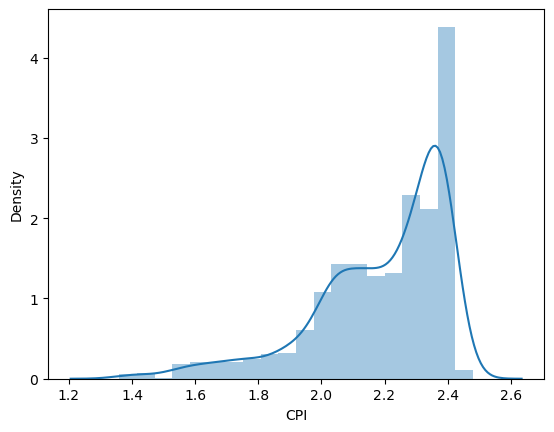

In [51]:
sns.distplot(df['CPI']);

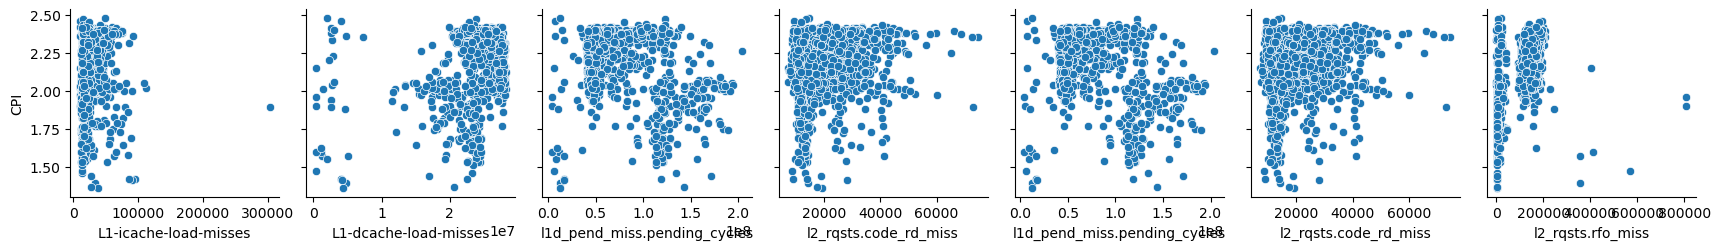

In [52]:
sns.pairplot(df, x_vars=li, y_vars='CPI', aspect=1, kind='scatter')
plt.show()

<Axes: >

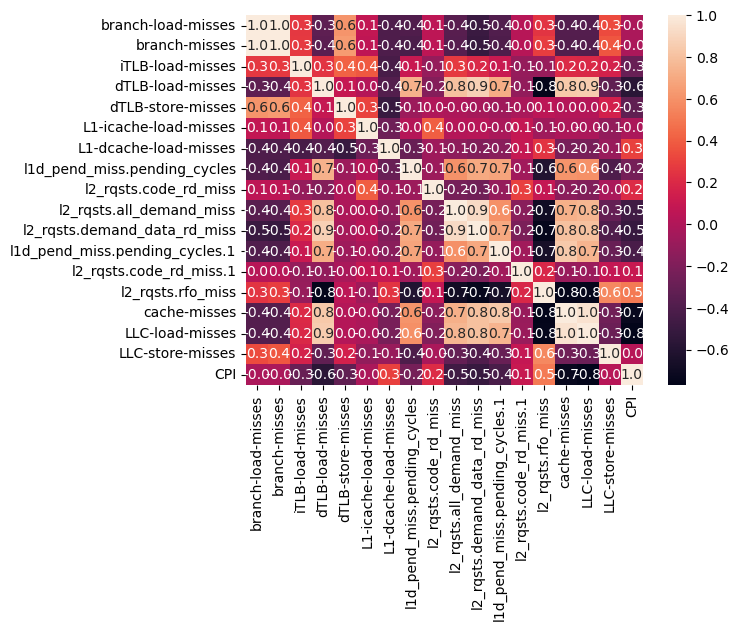

In [53]:
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [29]:
li=['L1-icache-load-misses', 'L1-dcache-load-misses', 'l1d_pend_miss.pending_cycles', 'l2_rqsts.code_rd_miss', 'l1d_pend_miss.pending_cycles', 'l2_rqsts.code_rd_miss', 'l2_rqsts.rfo_miss']

In [22]:
X = df[li]
y = df['CPI']

1.7592772277227688

In [71]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X=scaler.fit_transform(X)

from sklearn.preprocessing import minmax_scale
X=minmax_scale(X)
y=minmax_scale(y)
from statistics import mean
mean(y)

2.188462192013594

In [54]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [55]:
y_train.shape

(941,)

In [56]:
y_test.shape

(236,)

In [59]:
 from sklearn.linear_model import Ridge
 reg_model = Ridge(alpha=0.9).fit(X_train, y_train)

In [23]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(reg_model.coef_)

Intercept: 2.1944602680896477
[
 ('branch-misses', 0.00325880030953939),
 ('iTLB-load-misses', 0.051158490691113674),
 ('L1-ichache-misses', 0.01396299302388931),
 ('L1-dcache-misses', 0.20199572417067838),
 ('dTLB-store-misses', 0.013962993023889184),
 ('l2_rqsts.code_rd_miss', 0.02019957241706724),
 ('l2_rqsts.rfo_miss', 0.09690746156639989),
]


In [62]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [63]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [2.21308585 2.17408564 2.24634774 2.08271215 2.18345492 2.25092732
 2.2331695  2.3023677  2.20278776 1.99270954 2.20922329 2.17657428
 2.1805934  2.21009541 2.25568712 2.23873551 2.33024762 2.24905901
 2.37226964 2.24037483 2.00720349 2.27310676 2.35050395 2.22197537
 2.33572574 1.95417122 2.06342749 2.30269707 2.0832735  2.25368549
 2.24592557 2.24621516 2.23295876 2.22361399 2.40502706 2.24546563
 2.330226   2.25811645 2.26321812 1.96161188 2.23841064 2.21398355
 2.28465676 2.04312563 2.02302542 2.22738212 2.2913493  2.19648442
 2.16798509 1.92457102 2.33232081 2.18749551 2.26125595 2.18951697
 2.21373437 2.29459937 2.21597762 2.21208874 2.2252437  2.21159027
 2.2781515  2.17668637 2.27296286 2.2935759  2.29986333 2.21835517
 2.23028971 2.20981461 2.16447044 2.19141009 2.30650582 2.06702039
 2.31542553 2.1826989  2.20964096 2.2301117  2.01301258 2.27141956
 2.20110641 2.02077871 2.21786929 2.26766685 2.00791383 2.20567031
 2.19621878 2.36908598 2.25619967 2.0

In [64]:
reg_model_diff = pd.DataFrame({'Actual CPI value': y_test, 'Predicted CPI value': y_pred , '  Residuals': y_test-y_pred})
reg_model_diff
reg_model_diff.to_csv('residual.csv',index=False)
reg_model_diff

,Actual CPI value,Predicted CPI value,Residuals
134,1.97,2.213086,-0.243086
751,2.21,2.174086,0.035914
1058,2.21,2.246348,-0.036348
275,1.95,2.082712,-0.132712
875,2.35,2.183455,0.166545
...,...,...,...
903,2.34,2.262709,0.077291
914,2.24,2.270464,-0.030464
61,2.39,2.260270,0.129730
136,2.30,2.285836,0.014164


In [65]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred , '  Residue': y_test-y_pred})


In [30]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:',r2)
print('R^2 value :',r_squared)
print('F-ststistic value :  ')

Mean Absolute Error: 0.13148037751416222
Mean Square Error: 0.03091555218442704
Root Mean Square Error: 0.17582818939074316
R^2 value: 0.5336323335797875
F-statistic value: 17.260967243813027


In [4]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.52964210803236094


In [3]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values


0.000000e+00 
 7.603395e-01 
 1.144736e-16 
 1.186985e-04 
 3.718641e-10 
 1.186985e-04 
 3.718641e-10 
 2.361782e-39
